In [ ]:
# Imports
import folium
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hdbscan

In [23]:
# Loading Dataset
raw_df = pd.read_csv('encoded1.csv')

In [58]:
print(raw_df.Alert.unique())

[1 2 3 4]


In [79]:
lat= raw_df['Lat'].astype(float)
lng = raw_df['Long'].astype(float)
points = list(zip(lat, lng))

In [ ]:
lat_point , lng_point = lat.mean(), lng.mean()
zoom_level = 10

m = folium.Map(location=[lat_point, lng_point], zoom_start=zoom_level, scrollWheelZoom=False)

polyline = folium.PolyLine(locations=points, color='blue')

polyline.add_to(m)

m


In [39]:
loc_df= raw_df[['Alert','Lat','Long','Vehicle']] #.reset_index(drop=True) # Contains Lat, Long, Alert , Vehicle

In [40]:

# Load data from five Vehicles
v1 = loc_df[loc_df['Vehicle']==2846]
v2 = loc_df[loc_df['Vehicle']==805]
v3 = loc_df[loc_df['Vehicle']==1995]
v4 = loc_df[loc_df['Vehicle']==5339]
v5 = loc_df[loc_df['Vehicle']==3143]

In [51]:
tmp_df = v1[v1['Alert']==4]
data = tmp_df[['Lat','Long']].values #reset_index(drop=True).values


In [ ]:

# Create an HDBSCAN clusterer
clusterer = hdbscan.HDBSCAN(min_samples=5, gen_min_span_tree=True)


# Scatter plot colored by cluster labels

plt.scatter(tmp_df['Long'], tmp_df['Lat'], c=tmp_df['Cluster'], cmap='rainbow', s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('HDBSCAN Clusters')
plt.show()

# Display the DataFrame with cluster labels


<ipython-input-84-21138981ea19>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df1['Cluster'] = cluster_labels
<ipython-input-84-21138981ea19>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df2['Cluster'] = cluster_labels
<ipython-input-84-21138981ea19>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

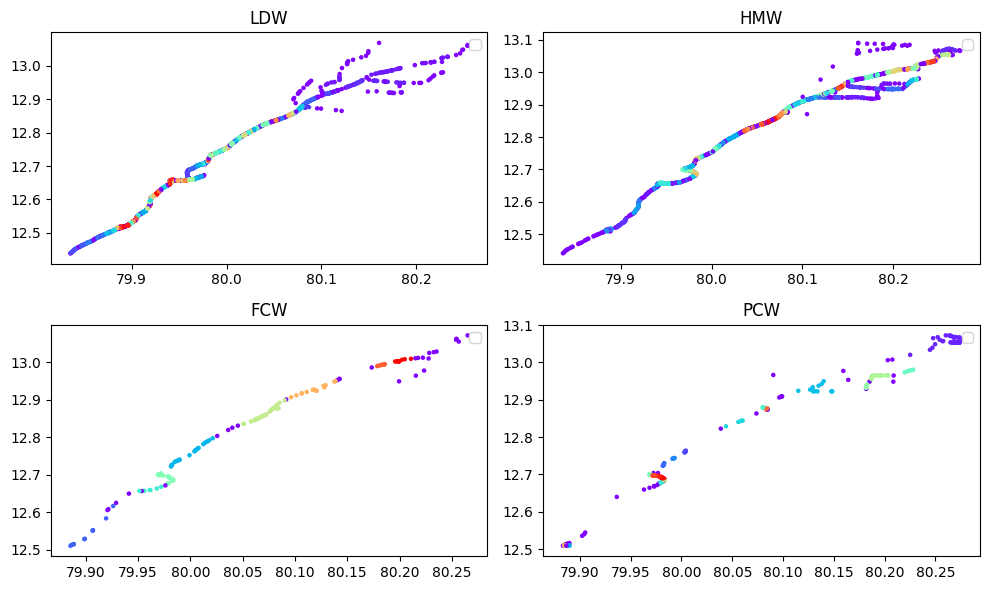

In [84]:

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Subplot for Each Vehicle for each alert

# Cluster 1
tmp_df1 = v1[v1['Alert']==1]
data = tmp_df1[['Lat','Long']].values #reset_index(drop=True).values
clusterer.fit(data)
cluster_labels = clusterer.labels_
tmp_df1['Cluster'] = cluster_labels

axs[0, 0].scatter(tmp_df1['Long'], tmp_df1['Lat'], c=tmp_df1['Cluster'], cmap='rainbow', s=5)
axs[0, 0].set_title('LDW')
axs[0, 0].legend()

# Cluster 1
tmp_df2 = v1[v1['Alert']==2]
data = tmp_df2[['Lat','Long']].values #reset_index(drop=True).values
clusterer.fit(data)
cluster_labels = clusterer.labels_
tmp_df2['Cluster'] = cluster_labels

axs[0, 1].scatter(tmp_df2['Long'], tmp_df2['Lat'], c=tmp_df2['Cluster'], cmap='rainbow', s=5)
axs[0, 1].set_title('HMW')
axs[0, 1].legend()

# Cluster 1
tmp_df3 = v1[v1['Alert']==3]
data = tmp_df3[['Lat','Long']].values #reset_index(drop=True).values
clusterer.fit(data)
cluster_labels = clusterer.labels_
tmp_df3['Cluster'] = cluster_labels

axs[1, 0].scatter(tmp_df3['Long'], tmp_df3['Lat'], c=tmp_df3['Cluster'], cmap='rainbow', s=5)
axs[1, 0].set_title('FCW')
axs[1, 0].legend()


# Cluster 1
tmp_df4 = v1[v1['Alert']==4]
data = tmp_df4[['Lat','Long']].values #reset_index(drop=True).values
clusterer.fit(data)
cluster_labels = clusterer.labels_
tmp_df4['Cluster'] = cluster_labels

axs[1, 1].scatter(tmp_df4['Long'], tmp_df4['Lat'], c=tmp_df4['Cluster'], cmap='rainbow', s=5)
axs[1, 1].set_title('PCW')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Display the figure
plt.show()


In [83]:
cluster1 = raw_df.copy()#[raw_df['Alert']==4]
data = cluster1[['Lat','Long']].values #reset_index(drop=True).values
clusterer.fit(data)
cluster_labels = clusterer.labels_
cluster1['Cluster'] = cluster_labels

print(len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0))

cluster_counts = cluster1['Cluster'].value_counts()

# Display the count of each cluster
print(max(cluster_counts))

1271
4261


In [78]:
cluster1.head()

,Alert,Date,Time,Lat,Long,Vehicle,Speed,Weekday,Cluster
0,1,2022-06-01,05:36:36,12.887403,80.083412,2846,48,Wednesday,-1
1,1,2022-06-01,05:36:47,12.892586,80.085794,2846,58,Wednesday,1265
2,1,2022-06-01,05:37:04,12.894932,80.087564,2846,57,Wednesday,1178
3,1,2022-06-01,05:37:31,12.898267,80.090062,2846,49,Wednesday,1129
4,1,2022-06-01,05:38:08,12.901594,80.092538,2846,58,Wednesday,-1
